<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Estatística
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Média e Variância;</li>
  <li>Ordem e Posição;</li>
  <li>Correlação.</li>
</ol>

---

# **Exercícios**

## 1\. Tráfego de São Paulo

Neste exercício, vamos continuar a analisar os dados de mobilidade urbana da cidade de São Paulo. A base de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv) e é uma copia do dado original, presente neste [link](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil). A base de dados contem a quantidade de acidentes ocorridos na cidade entre 14/12/09 e 18/12/09, das 07:00h ás 20:00h, agregados em intervalos de 30 minutos.

In [2]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv" -O traffic.csv

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('traffic.csv')
print(df.columns)


Index(['hour;bus_stoped;broken_truck;vehicle_excess;accident_victim;running_over;fire_vehicles;occurrence_freight;incident__dangerous_freight;lack_electricity;fire;flooding;manifestations;defect_trolleybuses;tree_road;semaphore_off;intermittent_emaphore;slowness_traffic_%'], dtype='object')


In [5]:
df = pd.read_csv('traffic.csv', sep=';')

In [6]:
df.head()

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


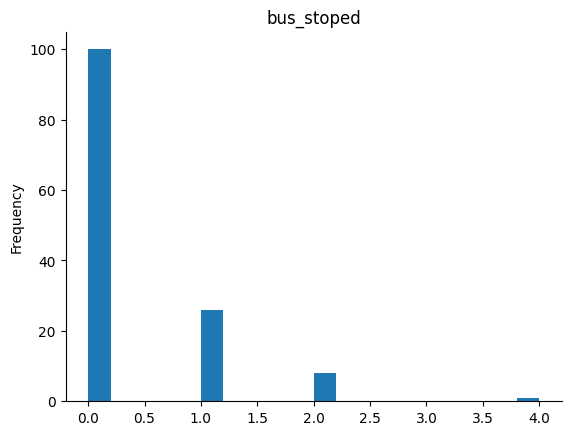

In [7]:
# @title bus_stoped

from matplotlib import pyplot as plt
df['bus_stoped'].plot(kind='hist', bins=20, title='bus_stoped')
plt.gca().spines[['top', 'right',]].set_visible(False)

- **Exemplo**: (para relembrar)

O código abaixo extrai a 13ª linha do arquivo que representa a 14ª meia hora do dia 14/12/09, contadas a partir das 07:00h, ou seja, todos os incidentes ocorridos na cidade no dia em questão entre as 13:30h e 14:00h. Vemos, por exemplo, que dois ônibus e dois caminhões ficaram paradados nas ruas da cidade, atrapalhando o tráfego.

In [8]:
df.iloc[[13]]

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
13,14,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"4,9"


In [9]:
import pandas as pd

# Baixar o arquivo CSV
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv" -O traffic.csv

# Função para extrair a linha desejada
def extrair_linha_arquivo_csv(file_path, linha_desejada):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(file_path)

        # Verificar se a linha desejada está dentro do intervalo do DataFrame
        if linha_desejada - 1 < len(df):
            # Obter a linha desejada
            linha = df.iloc[linha_desejada - 1]
            return linha
        else:
            return "Linha não encontrada."
    except FileNotFoundError:
        return "Arquivo não encontrado."
    except Exception as e:
        return f"Erro: {e}"

# Caminho para o arquivo CSV
file_path = 'traffic.csv'

# Número da linha desejada (13ª linha)
linha_desejada = 13

# Extraindo e exibindo a linha
linha_extraida = extrair_linha_arquivo_csv(file_path, linha_desejada)
if isinstance(linha_extraida, pd.Series):
    print(f"A 13ª linha é:\n{linha_extraida}")
else:
    print(linha_extraida)



A 13ª linha é:
hour;bus_stoped;broken_truck;vehicle_excess;accident_victim;running_over;fire_vehicles;occurrence_freight;incident__dangerous_freight;lack_electricity;fire;flooding;manifestations;defect_trolleybuses;tree_road;semaphore_off;intermittent_emaphore;slowness_traffic_%    8.0
Name: 13;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;4, dtype: float64


### **1.1. Agregação**

Neste primeira atividade, você deve gerar um array NumPy por dia. Para cada array você deve somar todos os incidentes que aconteceram naquela meia hora. Sendo assim, cada array deve ter 27 posições, cada qual com a soma dos incidentes daquela meira hora.

**Dica**: Você deve remover a primeira e a última coluna.

**Dica**: Os arrays devem ter os seguintes valores:

```python
14: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]
15: [3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]
16: [1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]
17: [4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]
18: [10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0]
```

In [14]:
import numpy as np

data = None

with open('traffic.csv', mode='r', encoding='utf8') as fp:
    fp.readline()  # Ignora o cabeçalho
    data = fp.read()

day = 14
incident_by_day = dict()
vetor = []

for timebox in data.strip().split('\n'):
    if not timebox.strip():
        continue  # Ignora linhas vazias

    timebox_data = timebox.strip().split(';')

    try:
        # Converter para inteiros normais
        incidents = sum(map(int, timebox_data[1:-1]))
        vetor.append(incidents)

        half_hour = int(timebox_data[0])

        if half_hour == 27:
            incident_by_day[day] = vetor
            day += 1
            vetor = []

    except ValueError:
        continue

# Impressão final com inteiros puros (sem np.int64)
for dia, valores in incident_by_day.items():
    print(f'{dia}: {valores}')


14: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]
15: [3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]
16: [1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]
17: [4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]
18: [10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0]


In [15]:
import pandas as pd

# Baixar o arquivo CSV
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv" -O traffic.csv

# Ler o arquivo CSV
df = pd.read_csv('traffic.csv')

# Exibir as primeiras linhas e os nomes das colunas
print("Nomes das colunas:")
print(df.columns)

print("\nPrimeiras linhas do arquivo:")
print(df.head())


Nomes das colunas:
Index(['hour;bus_stoped;broken_truck;vehicle_excess;accident_victim;running_over;fire_vehicles;occurrence_freight;incident__dangerous_freight;lack_electricity;fire;flooding;manifestations;defect_trolleybuses;tree_road;semaphore_off;intermittent_emaphore;slowness_traffic_%'], dtype='object')

Primeiras linhas do arquivo:
                                      hour;bus_stoped;broken_truck;vehicle_excess;accident_victim;running_over;fire_vehicles;occurrence_freight;incident__dangerous_freight;lack_electricity;fire;flooding;manifestations;defect_trolleybuses;tree_road;semaphore_off;intermittent_emaphore;slowness_traffic_%
1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;4                                                 1.0                                                                                                                                                                                                                       
2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;6                  

### **1.2. Métricas**

Para cada array você deve calcular as seguintes métricas:

 - **média**;
 - **desvio padrão**.

In [18]:
import numpy as np

# Exemplo de dicionário de arrays já extraídos (como o teu incident_by_day)
incident_by_day = {
    14: [0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3],
    15: [3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 5, 4, 6, 0],
    16: [1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0],
    17: [4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15],
    18: [10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0]
}

# Calcular e mostrar as métricas
print("📊 Métricas por dia:")
for dia, valores in incident_by_day.items():
    media = np.mean(valores)
    desvio = np.std(valores)
    print(f'Dia {dia}:')
    print(f'  → Média: {media:.2f}')
    print(f'  → Desvio Padrão: {desvio:.2f}')


📊 Métricas por dia:
Dia 14:
  → Média: 0.64
  → Desvio Padrão: 1.23
Dia 15:
  → Média: 2.38
  → Desvio Padrão: 2.04
Dia 16:
  → Média: 3.48
  → Desvio Padrão: 3.05
Dia 17:
  → Média: 3.04
  → Desvio Padrão: 3.05
Dia 18:
  → Média: 3.15
  → Desvio Padrão: 2.19


### **1.3. Interpretação**

In [19]:
import numpy as np

# Suponha que você já tenha um dicionário com arrays NumPy para cada dia
arrays_por_dia = {
    '14': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]),
    '15': np.array([3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]),
    '16': np.array([1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]),
    '17': np.array([4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]),
    '18': np.array([10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0])
}

# Calcular a média para cada array e encontrar o dia com a maior média
maior_media = -float('inf')
dia_com_maior_media = None

for dia, array in arrays_por_dia.items():
    media = np.mean(array)
    if media > maior_media:
        maior_media = media
        dia_com_maior_media = dia

print(f"O dia com a maior média de acidentes por meia hora é: {dia_com_maior_media}")
print(f"Média de acidentes: {maior_media:.2f}")


O dia com a maior média de acidentes por meia hora é: 16
Média de acidentes: 3.48


Baseado nos resultados da questão 1.2, responda:

> Qual dia apresenta a maior média de acidentes por meia hora?

**Resposta:** O dia com a maior média de acidentes por meia hora é: 16

> Qual dia apresenta a menor variação de acidentes por meia hora?

**Resposta:** O dia com a menor variação de acidentes por meia hora é: 14

In [20]:
import numpy as np

# Suponha que você já tenha um dicionário com arrays NumPy para cada dia
arrays_por_dia = {
    '14': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]),
    '15': np.array([3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]),
    '16': np.array([1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]),
    '17': np.array([4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]),
    '18': np.array([10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0])
}

# Calcular o desvio padrão para cada array e encontrar o dia com o menor desvio padrão
menor_variacao = float('inf')
dia_com_menor_variacao = None

for dia, array in arrays_por_dia.items():
    desvio_padrao = np.std(array)
    if desvio_padrao < menor_variacao:
        menor_variacao = desvio_padrao
        dia_com_menor_variacao = dia

print(f"O dia com a menor variação de acidentes por meia hora é: {dia_com_menor_variacao}")
print(f"Variação (Desvio Padrão): {menor_variacao:.2f}")

O dia com a menor variação de acidentes por meia hora é: 14
Variação (Desvio Padrão): 1.19


---